#### Testing a trained CSAC Model

Importing python modules and model

In [1]:
import torch, os
import numpy as np
from dataHandler import ClockDataset

MODEL_FOLDER = os.path.join(os.getcwd(), 'models')
TEST_DATASET = os.path.join(os.getcwd(), 'data/test')

device = 'cuda' if torch.cuda.is_available() else 'cpu'

test_dataset = ClockDataset(f_data=TEST_DATASET, transform=True)

#model = PtClassifier_V2(parameters=15, classes=1).to(device)
model = torch.load(f=os.path.join(MODEL_FOLDER, 'csac_ml_5.pth'),)
# model.parameters


View a sample of testing data with applied scaling.

In [2]:
c, l, cols, sn = test_dataset[0]

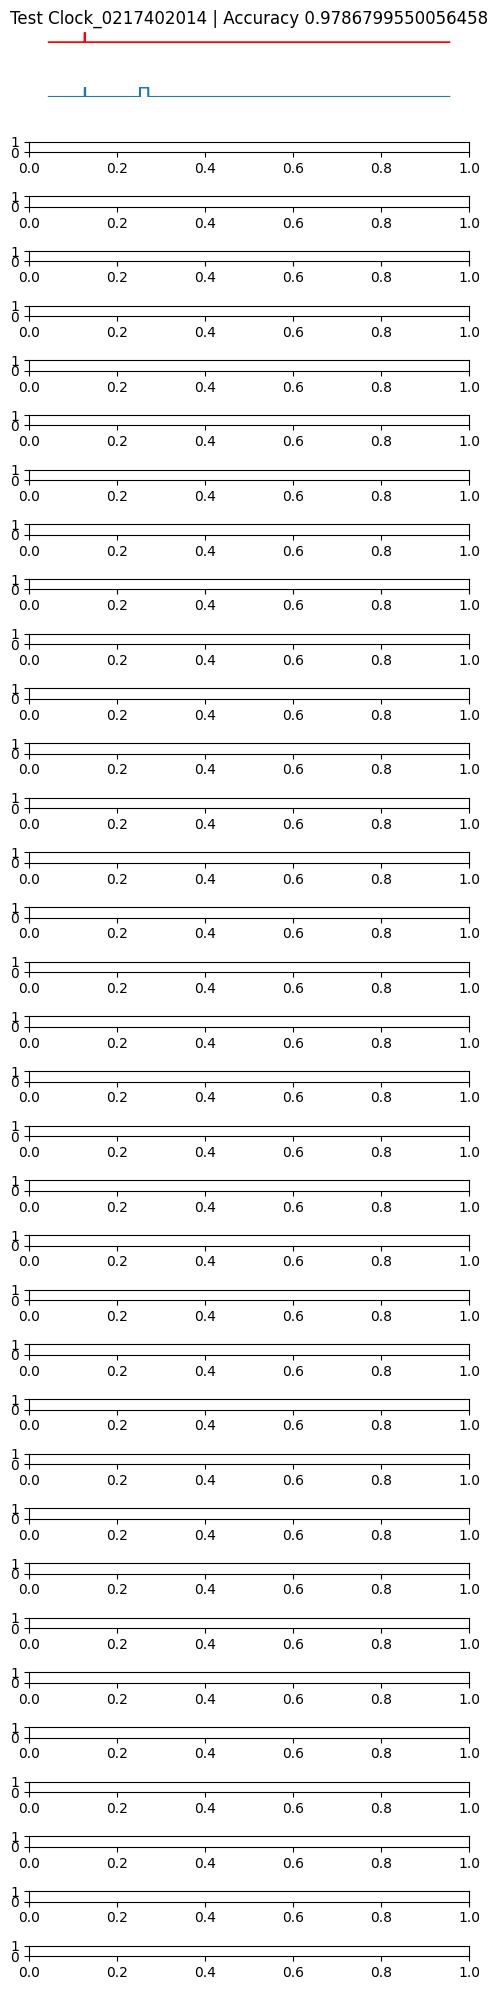

In [4]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=2*test_dataset.__len__(), ncols=1, figsize=(5, 20))
i=0
with torch.inference_mode():
    model.eval()
    for data in test_dataset:
        clock, labels, cols, sn = data
        clock = clock.to(device)
        
        prediction = model(clock)
        prediction = torch.round(torch.sigmoid(prediction)).cpu().to(torch.int64)
        acc = torch.sum(torch.eq(prediction, labels))

        ax[i].plot(prediction.cpu().numpy(), c='r')
        ax[i].axis("off")
        ax[i].set_title(f'Test Clock_{sn} | Accuracy {acc/len(labels)}')
        ax[i+1].plot(labels)
        ax[i+1].axis("off")
        i = i+2
        break
    plt.tight_layout()
     
        